In [37]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import random
import scipy

In [39]:
df = pd.read_csv("C:/Users/c/projects/gpu-moores-law/3dmark_timespy_3080.csv", parse_dates=['date'])
df.head()

,benchmark,benchmark_version,cpu_clock_freq,cpu_cores,cpu_litho,cpu_make,cpu_score,cpu_sku,cpu_socket,cpu_tdp,...,gpu_driver_status,gpu_driver_version,gpu_memclock_freq,gpu_score,gpu_vendor,gpu_vram,os,ram,ram_clock_freq,score
0,Time Spy,1.2,6903,10,14 nm,Intel,19241,Intel Core i9-10900K Processor,FCLGA1200,125,...,Approved,27.21.14.5638,1314,21560,NVidia Corporation,10240,64-bit Windows 10 (10.0.19042),16384,4200,21177
1,Time Spy,1.2,6803,10,14 nm,Intel,19164,Intel Core i9-10900K Processor,FCLGA1200,125,...,Approved,27.21.14.5638,1313,21531,NVidia Corporation,10240,64-bit Windows 10 (10.0.19042),16384,4196,21139
2,Time Spy,1.2,6602,10,14 nm,Intel,18744,Intel Core i9-10900K Processor,FCLGA1200,125,...,Approved,27.21.14.5638,1315,21566,NVidia Corporation,10240,64-bit Windows 10 (10.0.19042),16384,4198,21089
3,Time Spy,1.2,6502,10,14 nm,Intel,18526,Intel Core i9-10900K Processor,FCLGA1200,125,...,Approved,27.21.14.5638,1314,21517,NVidia Corporation,10240,64-bit Windows 10 (10.0.19042),16384,4200,21008
4,Time Spy,1.2,5408,10,14 nm,Intel,16218,Intel Core i9-10900K Processor,FCLGA1200,125,...,Approved,27.21.14.5638,1319,20100,"Asustek Computer, Inc.",10240,64-bit Windows 10 (10.0.18363),32768,4404,19403


In [55]:
df.info()
df.date

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 572 entries, 0 to 571
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   benchmark              572 non-null    object        
 1   benchmark_version      572 non-null    float64       
 2   cpu_clock_freq         572 non-null    int64         
 3   cpu_cores              572 non-null    int64         
 4   cpu_litho              572 non-null    object        
 5   cpu_make               572 non-null    object        
 6   cpu_score              572 non-null    int64         
 7   cpu_sku                572 non-null    object        
 8   cpu_socket             572 non-null    object        
 9   cpu_tdp                572 non-null    int64         
 10  date                   572 non-null    datetime64[ns]
 11  gpu                    572 non-null    object        
 12  gpu_avg_clock_freq     566 non-null    float64    

0     2020-09-22
1     2020-09-22
2     2020-09-22
3     2020-09-22
4     2020-09-22
         ...    
567   2020-09-17
568   2020-09-26
569   2020-09-24
570   2020-09-28
571   2020-09-23
Name: date, Length: 572, dtype: datetime64[ns]

In [ ]:
sns.heatmap(df.drop(['gpu_count'], axis=1).corr())

In [47]:
intel = df[df['cpu_make'] == 'Intel']
amd = df[df['cpu_make'] == 'AMD']

In [48]:
print('AMD size: {}\nIntel size: {}'.format(amd.shape, intel.shape))

intel_bal = intel.sample(199, replace=False)
intel = intel_bal
print('New Intel size: {}'.format(intel.shape))

AMD size: (199, 27)
Intel size: (373, 27)
New Intel size: (199, 27)


[]

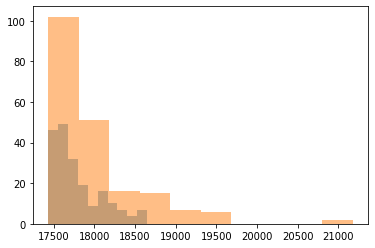

In [49]:
sns.hist(amd['score'], alpha=.5, label='AMD')
sns.hist(intel['score'], alpha=.5, label='Intel')
plt.plot()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x19ddb434f08&gt;

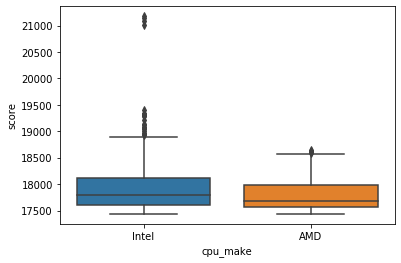

In [54]:
sns.boxplot(data=df, x='cpu_make', y='score')

In [25]:
amd.describe()

,benchmark_version,cpu_clock_freq,cpu_cores,cpu_score,cpu_tdp,gpu_avg_clock_freq,gpu_avg_memclock_freq,gpu_avg_temp,gpu_clock_freq,gpu_count,gpu_memclock_freq,gpu_score,gpu_vram,ram,score
count,199.000000,199.000000,199.000000,199.000000,199.0,195.000000,195.000000,195.000000,199.000000,199.0,199.000000,199.000000,199.0,199.000000,199.000000
mean,1.191960,4450.809045,15.155779,14649.879397,105.0,1931.189744,1248.292308,55.902564,2055.100503,1.0,1252.497487,18515.055276,10240.0,42975.869347,17792.366834
std,0.039385,134.481660,1.636347,1115.058949,0.0,35.320913,42.790929,8.618234,99.008927,0.0,42.326398,290.289027,0.0,20259.623858,301.199506
min,1.000000,4201.000000,12.000000,12094.000000,105.0,1818.000000,1162.000000,34.000000,1475.000000,1.0,1188.000000,17786.000000,10240.0,16384.000000,17434.000000
25%,1.200000,4391.000000,16.000000,13593.000000,105.0,1910.500000,1213.000000,50.000000,2040.000000,1.0,1213.000000,18338.000000,10240.0,32768.000000,17574.500000
50%,1.200000,4491.000000,16.000000,14526.000000,105.0,1935.000000,1253.000000,55.000000,2055.000000,1.0,1263.000000,18533.000000,10240.0,32768.000000,17689.000000
75%,1.200000,4522.500000,16.000000,15661.500000,105.0,1950.500000,1282.000000,63.000000,2085.000000,1.0,1282.000000,18696.000000,10240.0,65536.000000,17980.000000
max,1.200000,4765.000000,16.000000,16593.000000,105.0,2029.000000,1350.000000,76.000000,2235.000000,1.0,1350.000000,19483.000000,10240.0,131072.000000,18648.000000


In [30]:
intel.describe()

,benchmark_version,cpu_clock_freq,cpu_cores,cpu_score,cpu_tdp,gpu_avg_clock_freq,gpu_avg_memclock_freq,gpu_avg_temp,gpu_clock_freq,gpu_count,gpu_memclock_freq,gpu_score,gpu_vram,ram,score
count,199.00000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,198.000000,199.000000,199.0,199.000000,199.000000,199.0,199.000000,199.000000
mean,1.18392,5164.135678,9.728643,14645.341709,119.924623,1934.874372,1257.432161,56.404040,2065.854271,1.0,1264.361809,18697.050251,10240.0,27004.783920,17920.597990
std,0.05452,181.386486,1.233675,1441.710034,14.087366,59.627372,55.177163,7.098179,64.682784,0.0,54.364369,504.602311,0.0,10883.927037,477.771372
min,1.00000,4516.000000,8.000000,11599.000000,65.000000,1809.000000,1153.000000,36.000000,1935.000000,1.0,1188.000000,17797.000000,10240.0,16384.000000,17448.000000
25%,1.20000,5004.000000,10.000000,13432.500000,125.000000,1897.500000,1194.500000,52.000000,2025.000000,1.0,1203.500000,18404.000000,10240.0,16384.000000,17591.000000
50%,1.20000,5203.000000,10.000000,14808.000000,125.000000,1933.000000,1263.000000,55.000000,2055.000000,1.0,1275.000000,18610.000000,10240.0,32768.000000,17778.000000
75%,1.20000,5300.000000,10.000000,15914.000000,125.000000,1967.000000,1301.500000,62.000000,2100.000000,1.0,1313.000000,18964.000000,10240.0,32768.000000,18130.000000
max,1.20000,6502.000000,18.000000,18526.000000,165.000000,2369.000000,1363.000000,71.000000,2400.000000,1.0,1363.000000,21517.000000,10240.0,65536.000000,21008.000000


In [36]:
scipy.stats.median_test(intel['score'], amd['score'])

(5.788944723618091,
 0.01612726725577717,
 17725.5,
 array([[112,  87],
        [ 87, 112]], dtype=int64))

In [ ]:
ref = ['', '', '', '', 'Name', 
        '', '', '', '', '', '', 
        '\xa0Cancel', '', '', '', '', 
        '', 'Description', '', '', '', 
        '', '', '', '', ' Cancel', 
        '', '', '', '', '', 
        'User', '', '', '\t\t\t\t\t\t\t\t\t\t', '\t\t\t\t\t\t\t\t\t\t\trbuass', 
        '\t\t\t\t\t\t\t\t\t\t\t', '\t\t\t\t\t\t\t\t\t\t', '\t\t\t\t\t\t\t\t\t\t', '', '', 
        '', '', '', 'Graphics Card', '', 
        'Graphics Card', '', 'NVIDIA GeForce RTX 3080', '', 'Vendor', 
        'NVidia Corporation', '# of cards', '1', 'SLI / CrossFire', 'Off', 
        'Memory', '10,240 MB', 'Clock frequency', '2,415 MHz (1,440 MHz)', 'Average clock frequency', 
        '2,393 MHz', 'Memory clock frequency', '1,314 MHz (1,188 MHz)', 'Average memory clock frequency', '1,314 MHz', 
        'Average temperature', 'N/A', 'Driver version', '27.21.14.5638', 'Driver status', 
        'Approved ', '', '', '', '', 
        'Processor', '', 'Processor', '', 'Intel Core i9-10900K Processor', 
        '', 'Clock frequency', '6,903 MHz (3,700 MHz)', '', 'Physical / logical processors', 
        '1 / 20', '# of cores', '10', 'Package', 'FCLGA1200', 
        'Manufacturing process', '14 nm', 'TDP', '125 W', '', 
        '', '', 'General', '', 'Operating system', 
        '64-bit Windows 10 (10.0.19042)', 'Motherboard', 'ASUSTeK COMPUTER INC. ROG MAXIMUS XII APEX', 'Memory', '16,384 MB', 
        'Module 1', '8,192 MB Galaxy Microsystems Ltd. DDR4 @ 4,200 MHz', 'Module 2', '8,192 MB Galaxy Microsystems Ltd. DDR4 @ 4,200 MHz', 
        'Hard drive model', '128 GB Lexar SSD', '', '', '']

In [ ]:
print(ref.index('Intel'))